In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# import user functions
from mMTC.ZC_sequence import zc_sequence, zc_shift, cyclic_correlation, discrete_fourier_transform

In [2]:
# ZC sequence params
# First sequence
NZC = 5
r = 1

# Second sequence (for cross-correlation)
NZC1 = 5
r1 = 4

# Accuracy
ACURANCY = 8

# Generate ZC-sequence
n_values = np.arange(0, NZC)
zc_values = zc_sequence(r, NZC)
zc_values_y = zc_sequence(r1, NZC1)

# Print sequences
pd.DataFrame({
    'ZC squence x':  np.round(zc_values, decimals=4),
    'ZC squence y':  np.round(zc_values_y, decimals=4)
})

,ZC squence x,ZC squence y
0,1.0000+0.0000j,1.0000+0.0000j
1,0.3090-0.9511j,0.3090+0.9511j
2,-0.8090+0.5878j,-0.8090-0.5878j
3,0.3090-0.9511j,0.3090+0.9511j
4,1.0000+0.0000j,1.0000+0.0000j


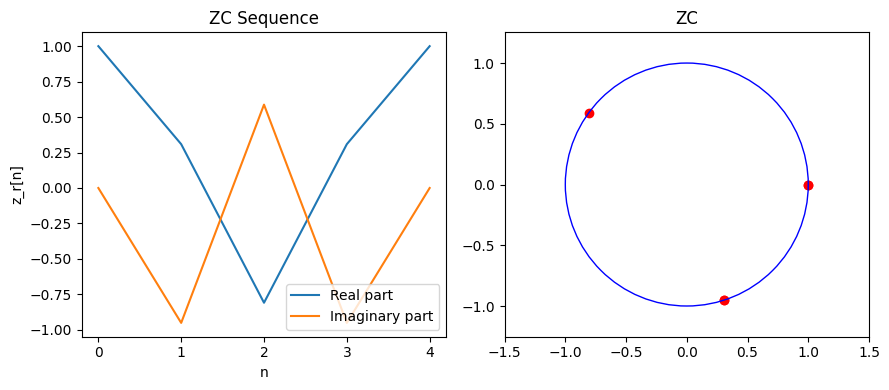

In [3]:
# Plot the ZC sequence
plt.figure(figsize=(9, 4))

# Plot ZC sequence
plt.subplot(1, 2, 1)
plt.plot(n_values, np.real(zc_values), label='Real part')
plt.plot(n_values, np.imag(zc_values), label='Imaginary part')
plt.xlabel('n')
plt.ylabel('z_r[n]')
plt.title('ZC Sequence')
plt.legend(loc='lower right')

# Plot Complex Plane with Complex numbers and circle
plt.subplot(1, 2, 2)
plt.scatter(np.real(zc_values), np.imag(zc_values), color='red', label=None, marker='o')
plt.title('ZC')
plt.axis('equal')
circle = plt.Circle((0, 0), radius=1, edgecolor='b', facecolor='none')
plt.gca().add_patch(circle)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.tight_layout()

plt.show()

In [4]:
# Simulate ZC-sequence auto-correlation test
# Zero Cyclic Autocorrelation property
print('\nCyclic auto-correlation result: ')
correlation_res = []
for tao in range(NZC):
    z_p_values = zc_shift(zc_values, tao)
    auto_correlate = cyclic_correlation(zc_values, z_p_values)
    correlation_res.append(auto_correlate)

pd.DataFrame({
    'Correlation':  np.around(np.array(correlation_res), decimals=ACURANCY),
    'Reduced Correlation':  np.around(np.array(correlation_res) / NZC, decimals=ACURANCY),
})


Cyclic auto-correlation result: 


,Correlation,Reduced Correlation
0,5.0-0.0j,1.0-0.0j
1,-0.0+0.0j,-0.0+0.0j
2,0.0+0.0j,0.0+0.0j
3,0.0-0.0j,0.0-0.0j
4,-0.0-0.0j,-0.0-0.0j


In [5]:
# Simulate ZC-sequence cross-correlation test
# Fixed Cyclic Cross-Correlation property

print('\nCyclic cross-correlation result:')

correlation_res = []
for tao in range(NZC):
    zc_values_y_shifted = zc_shift(zc_values_y, tao)
    cross_correlate = cyclic_correlation(zc_values, zc_values_y_shifted)
    correlation_res.append(cross_correlate)

pd.DataFrame({
    'Correlation':  np.around(np.array(correlation_res), decimals=ACURANCY),
    'Reduced Correlation':  np.around(np.array(correlation_res) / NZC, decimals=ACURANCY),
})


Cyclic cross-correlation result:


,Correlation,Reduced Correlation
0,0.690983+2.126627j,0.138197+0.425325j
1,2.236068+0.000000j,0.447214+0.000000j
2,-1.809017+1.314328j,-0.361803+0.262866j
3,-1.809017+1.314328j,-0.361803+0.262866j
4,2.236068+0.000000j,0.447214+0.000000j


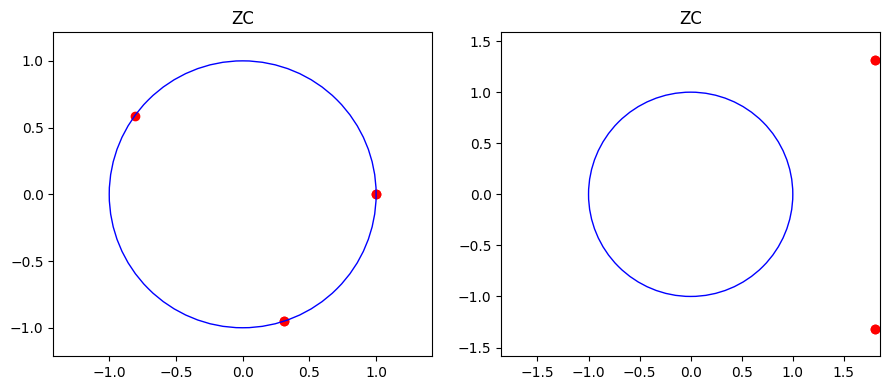


Cyclic auto-correlation result: 


,Correlation,Reduced Correlation,,ZC squence,Fourier Transform
0,25.0- 0.0j,5.0-0.0j,,1.0000+0.0000j,1.8090-1.3143j
1,0.0+ 0.0j,0.0+0.0j,,0.3090-0.9511j,1.8090+1.3143j
2,0.0- 0.0j,0.0-0.0j,,-0.8090+0.5878j,-2.2361-0.0000j
3,0.0+ 0.0j,0.0+0.0j,,0.3090-0.9511j,1.8090+1.3143j
4,0.0- 0.0j,0.0-0.0j,,1.0000+0.0000j,1.8090-1.3143j


In [13]:
# Discrete Fourier Transform
# Generate ZC from Discrete Fourier Transform
fourier_sequence = discrete_fourier_transform(zc_values, 5)

# Plot the ZC sequence
plt.figure(figsize=(9, 4))

# Plot ZC sequence
plt.subplot(1, 2, 1)
plt.scatter(np.real(zc_values), np.imag(zc_values), color='red', label=None, marker='o')
plt.title('ZC')
plt.axis('equal')
circle = plt.Circle((0, 0), radius=1, edgecolor='b', facecolor='none')
plt.gca().add_patch(circle)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.tight_layout()

# Plot Fourier sequence
plt.subplot(1, 2, 2)
plt.scatter(np.real(fourier_sequence), np.imag(fourier_sequence), color='red', label=None, marker='o')
plt.title('ZC')
plt.axis('equal')
circle = plt.Circle((0, 0), radius=1, edgecolor='b', facecolor='none')
plt.gca().add_patch(circle)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.tight_layout()

plt.show()


# Simulate ZC-sequence auto-correlation test
# Zero Cyclic Autocorrelation property
print('\nCyclic auto-correlation result: ')
correlation_res = []
for tao in range(NZC):
    z_p_values = zc_shift(fourier_sequence, tao)
    auto_correlate = cyclic_correlation(fourier_sequence, z_p_values)
    correlation_res.append(auto_correlate)

pd.DataFrame({
    'Correlation':  np.around(np.array(correlation_res), decimals=ACURANCY),
    'Reduced Correlation':  np.around(np.array(correlation_res) / NZC, decimals=ACURANCY),
    '  ': '  ',
    'ZC squence':  np.round(zc_values, decimals=4),
    'Fourier Transform':  np.round(fourier_sequence, decimals=4)
})
